In [461]:
import numpy as np
import pandas as pd
from astroplan import Observer
from astropy import coordinates
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astroplan.plots import plot_airmass
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint, observability_table
import astropy.units as u
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import Constraint
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

In [528]:
quasars=pd.read_fwf('quasars3.txt', skiprows=4, delimiter='|')
quasars

,name,ra,dec
0,WISEA J055431.47-431632.4,05 54 31.48,-43 16 32.5
1,WISEA J095244.92-431631.2,09 52 44.93,-43 16 31.3
2,WISEA J050310.49-431630.1,05 03 10.49,-43 16 30.1
3,WISEA J200949.47-431629.9,20 09 49.48,-43 16 30.0
4,WISEA J130532.19-431629.1,13 05 32.20,-43 16 29.2
5,WISEA J213253.22-431629.1,21 32 53.22,-43 16 29.2
6,WISEA J125759.35-431627.0,12 57 59.36,-43 16 27.1
7,WISEA J095142.02-431626.9,09 51 42.02,-43 16 26.9
8,WISEA J122754.06-431626.5,12 27 54.07,-43 16 26.5
9,WISEA J053425.45-431624.3,05 34 25.46,-43 16 24.3


In [529]:
dupont=Observer.at_site("lco")
dupont

<Observer: name='lco',
    location (lon, lat, el)=(-70.70166666666665 deg, -29.003333333333327 deg, 2281.9999999994607 m),
    timezone=<UTC>>

In [530]:
table_values=quasars.as_matrix()

targets=[FixedTarget(coord=SkyCoord(RA, DEC, unit=[u.hour,u.deg]), name=Name)
           for Name, RA, DEC in table_values]

targets[0:10]

/Users/josephbreneman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


[<FixedTarget "WISEA J055431.47-431632.4" at SkyCoord (ICRS): (ra, dec) in deg (88.63116667, -43.27569444)>,
 <FixedTarget "WISEA J095244.92-431631.2" at SkyCoord (ICRS): (ra, dec) in deg (148.18720833, -43.27536111)>,
 <FixedTarget "WISEA J050310.49-431630.1" at SkyCoord (ICRS): (ra, dec) in deg (75.79370833, -43.27502778)>,
 <FixedTarget "WISEA J200949.47-431629.9" at SkyCoord (ICRS): (ra, dec) in deg (302.45616667, -43.275)>,
 <FixedTarget "WISEA J130532.19-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (196.38416667, -43.27477778)>,
 <FixedTarget "WISEA J213253.22-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (323.22175, -43.27477778)>,
 <FixedTarget "WISEA J125759.35-431627.0" at SkyCoord (ICRS): (ra, dec) in deg (194.49733333, -43.27419444)>,
 <FixedTarget "WISEA J095142.02-431626.9" at SkyCoord (ICRS): (ra, dec) in deg (147.92508333, -43.27413889)>,
 <FixedTarget "WISEA J122754.06-431626.5" at SkyCoord (ICRS): (ra, dec) in deg (186.97529167, -43.27402778)>,
 <FixedTarget "WISEA

In [531]:
from astropy.table import Table
from astroplan import is_observable, is_always_observable, months_observable
from astroplan.utils import time_grid_from_range

In [532]:

constraints = [AirmassConstraint(1.5), AtNightConstraint.twilight_astronomical(), MoonSeparationConstraint(35*u.deg)]

beginning=Time(['2019-05-15'])
end=Time(['2019-05-30'])

window_range=[beginning, end]
window_time_grid=time_grid_from_range(window_range)
observation_range=Time(['2019-05-15','2019-05-30'])

observing_table=observability_table(constraints, dupont, targets, time_range=observation_range)
pd.set_option('display.max_rows', 100)
observing_table1=observing_table.to_pandas()
observing_table1

,target name,ever observable,always observable,fraction of time observable
0,WISEA J055431.47-431632.4,False,False,0.000000
1,WISEA J095244.92-431631.2,True,False,0.136111
2,WISEA J050310.49-431630.1,False,False,0.000000
3,WISEA J200949.47-431629.9,True,False,0.138889
4,WISEA J130532.19-431629.1,True,False,0.270833
5,WISEA J213253.22-431629.1,True,False,0.105556
6,WISEA J125759.35-431627.0,True,False,0.265278
7,WISEA J095142.02-431626.9,True,False,0.136111
8,WISEA J122754.06-431626.5,True,False,0.244444
9,WISEA J053425.45-431624.3,False,False,0.000000


In [543]:
mask=observing_table1['fraction of time observable'] >= 0.235

observable=observing_table1[mask]['target name']
print(observable)

4     WISEA J130532.19-431629.1
6     WISEA J125759.35-431627.0
8     WISEA J122754.06-431626.5
10    WISEA J134136.66-431624.0
30    WISEA J140608.56-431610.3
38    WISEA J131601.61-431606.1
49    WISEA J121750.29-431556.3
52    WISEA J121753.42-431553.6
74    WISEA J150803.55-431536.1
87    WISEA J125448.19-431525.8
88    WISEA J144407.40-431524.6
Name: target name, dtype: object


In [544]:
target_10=(targets[4], targets[6], targets[8], targets[10], targets[30], targets[38], targets[49], 
        targets[52], targets[74], targets[87])
target_10

(<FixedTarget "WISEA J130532.19-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (196.38416667, -43.27477778)>,
 <FixedTarget "WISEA J125759.35-431627.0" at SkyCoord (ICRS): (ra, dec) in deg (194.49733333, -43.27419444)>,
 <FixedTarget "WISEA J122754.06-431626.5" at SkyCoord (ICRS): (ra, dec) in deg (186.97529167, -43.27402778)>,
 <FixedTarget "WISEA J134136.66-431624.0" at SkyCoord (ICRS): (ra, dec) in deg (205.40279167, -43.27336111)>,
 <FixedTarget "WISEA J140608.56-431610.3" at SkyCoord (ICRS): (ra, dec) in deg (211.53570833, -43.26955556)>,
 <FixedTarget "WISEA J131601.61-431606.1" at SkyCoord (ICRS): (ra, dec) in deg (199.00675, -43.26838889)>,
 <FixedTarget "WISEA J121750.29-431556.3" at SkyCoord (ICRS): (ra, dec) in deg (184.45954167, -43.26563889)>,
 <FixedTarget "WISEA J121753.42-431553.6" at SkyCoord (ICRS): (ra, dec) in deg (184.472625, -43.26491667)>,
 <FixedTarget "WISEA J150803.55-431536.1" at SkyCoord (ICRS): (ra, dec) in deg (227.01483333, -43.26005556)>,
 <FixedTarget "

In [548]:
time=np.arange('2019-05-15', '2019-05-31', dtype='datetime64[D]')
start_time=(['2019-05-15'])
end_time=(['2019-05-30'])

moon_ratio=dupont.moon_illumination(time)
moon_ratio

moon_phase = dupont.moon_phase(time)
print(moon_phase)
print(moon_ratio)

[0.88831637 0.6586472  0.43176186 0.21192157 0.07238651 0.24816147
 0.45501737 0.65920405 0.85897168 1.05458923 1.24694396 1.43723874
 1.6268483  1.81721446 2.00975029 2.20574009] rad
[0.81535972 0.89541047 0.95411494 0.98881427 0.99869062 0.98468282
 0.9491267  0.89524    0.82660822 0.74679251 0.65911051 0.56658044
 0.47198869 0.37803407 0.28750359 0.20343388]


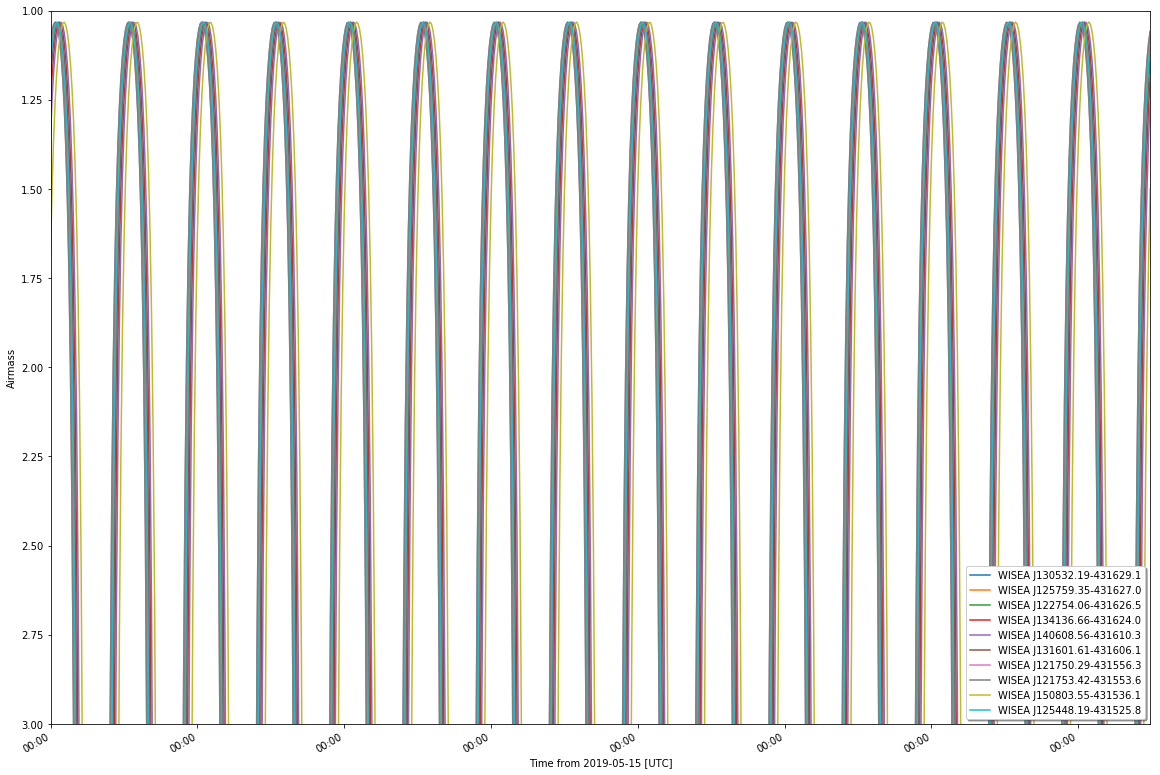

In [549]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_airmass

fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,10.5) 

fig.tight_layout()

observation_time = Time('2019-05-15', '2019-05-30')
plot_airmass(target_10, dupont, window_time_grid)
ax.legend(loc=0,shadow=True)
plt.show()
